In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv', usecols=[0, 1, 2])

In [15]:
df.head()

,Wine,Alcohol,Malic.acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

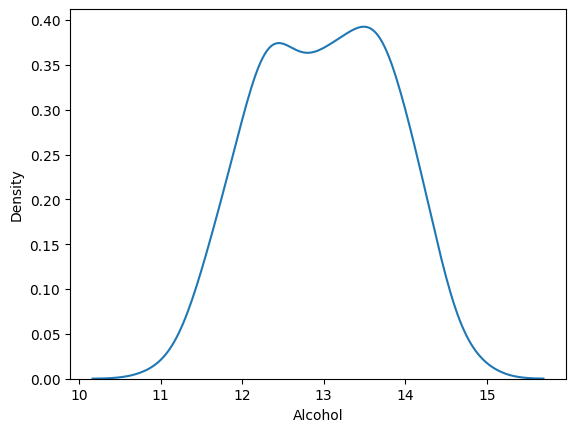

In [16]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic.acid', ylabel='Density'>

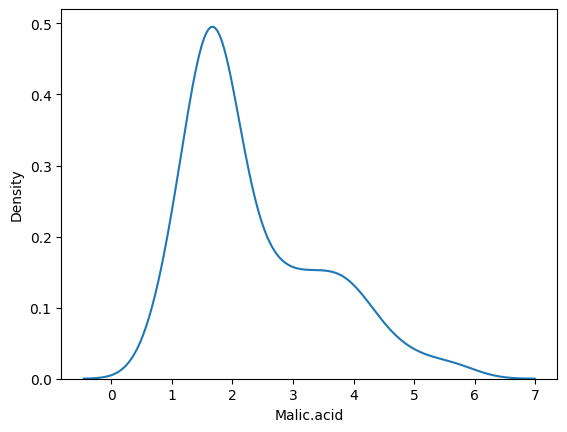

In [17]:
sns.kdeplot(df['Malic.acid'])

<Axes: xlabel='Alcohol', ylabel='Malic.acid'>

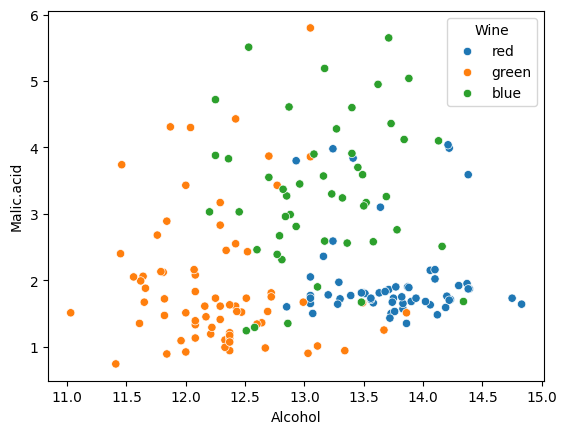

In [21]:
sns.scatterplot(x='Alcohol', y='Malic.acid', hue=df['Wine'].map({1: 'red', 2: 'green', 3: 'blue'}), data=df)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Wine', axis=1),
                                                    df['Wine'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape , X_test.shape

((124, 2), (54, 2))

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fitting and transforming X_train
X_train_scaled = scaler.fit_transform(X_train)

# transforming X_test
X_test_scaled = scaler.transform(X_test)

In [28]:
# converting scaled datasets into DF
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [30]:
# before scaling
np.round(X_train.describe(), 1)

,Alcohol,Malic.acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [31]:
# after scaling
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic.acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


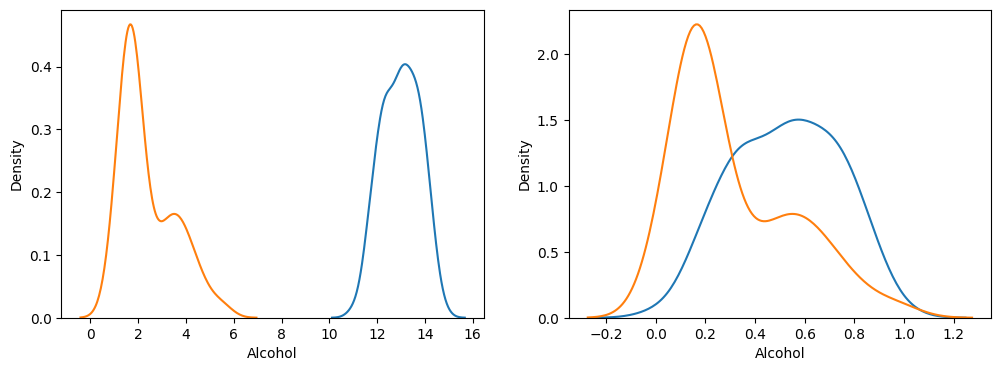

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic.acid'], ax=ax1)

sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic.acid'], ax=ax2)
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic.acid'>

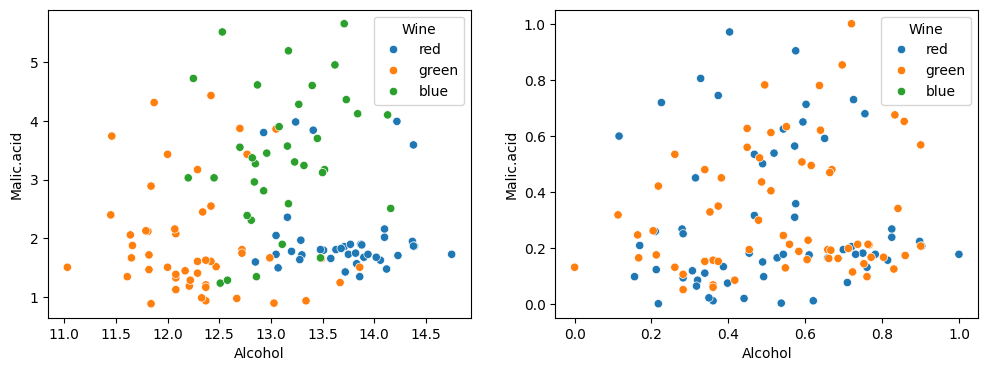

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.scatterplot(x='Alcohol', y='Malic.acid', hue=df['Wine'].map({1: 'red', 2: 'green', 3: 'blue'}), data=X_train, ax=ax1)
sns.scatterplot(x='Alcohol', y='Malic.acid', hue=df['Wine'].map({1: 'red', 2: 'green', 3: 'blue'}), data=X_train_scaled, ax=ax2)



> Since we are squishing the values between 0 and 1, the effect of outliers is also squished

